In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [2]:
#label_to_index = {'Bhoopali': 0, 'Yaman': 1, 'Bhairava': 2}
df = pd.read_csv('audio_features_dataset.csv')

In [3]:
feature_cols = [col for col in df.columns if col.startswith('mfcc_')]
X = df[feature_cols].values
y = df['Ragas'].values
print("Shape of X before reshape:", X.shape)
print("Shape of y before encode:", y.shape)


Shape of X before reshape: (174, 120)
Shape of y before encode: (174,)


In [4]:
# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(np.unique(y_encoded))
y_categorical = to_categorical(y_encoded, num_classes=num_classes)
print("Shape of y_categorical before split:", y_categorical.shape)

Shape of y_categorical before split: (174, 9)


In [5]:
print(num_classes)

9


In [6]:
originallabels = label_encoder.classes_
print("Original labels: ", originallabels)
print("Encoded labels: ", np.unique(y_encoded))

Original labels:  ['Asavari' 'Bageshree' 'Bhairava' 'Bhairavi' 'Bhoopali' 'Darbari'
 'Malkauns' 'Sarang' 'Yaman']
Encoded labels:  [0 1 2 3 4 5 6 7 8]


In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=127)
X_train_flat = np.array([x.flatten() for x in X_train])
le = LabelEncoder()
y_train_numerical = le.fit_transform(y_train)
y_val_numerical = le.transform(y_val)
y_train_encoded = to_categorical(y_train_numerical, num_classes=num_classes)
y_val_encoded = to_categorical(y_val_numerical, num_classes=num_classes)

In [8]:
print(y_val_encoded)

[[0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0.

In [9]:
print(X_train[0])
print(X_train_flat[0])

[-2.61252391e+02  5.74198173e+01  2.74676558e+01  7.25341345e+00
  1.38013295e+00 -3.08771908e-01 -2.83164972e+00 -6.78484813e+00
 -1.03267925e+01 -1.22156974e+01 -1.06351322e+01 -4.55901166e+00
  6.09755293e-01  7.65557576e-01 -9.97187966e-01 -2.05141524e+00
 -1.85548509e+00 -2.12927523e-02  2.96476139e-01 -2.88210832e+00
 -7.15592885e+00 -7.65930981e+00 -3.74355295e+00  2.22966860e-01
  1.49825838e+00  9.14272435e-01 -1.06144305e+00 -4.33780340e+00
 -6.42655211e+00 -4.67760787e+00 -3.52592526e-01  1.24902710e+00
 -1.71414564e+00 -4.15764848e+00 -3.81108319e+00 -2.26726175e+00
 -1.79593507e+00 -2.48523074e+00 -4.57283428e+00 -5.83181665e+00
 -1.91434367e-02 -2.42260699e-02  4.50456561e-03  8.23851241e-03
 -2.47799717e-03  9.03506632e-03  1.34852542e-02  4.99160041e-03
  2.80475372e-03 -1.49611556e-03  2.51169673e-03  5.25171873e-03
  5.10771760e-03  4.91774089e-03  4.48637388e-05 -5.01342547e-04
  7.64770565e-03  1.23000177e-02  9.64075451e-03  6.37370284e-03
 -2.47187037e-03 -1.26890

In [10]:
print("Shape of X_train:", X_train_flat.shape)
print("Shape of input:", X_train_flat.shape[1])

Shape of X_train: (139, 120)
Shape of input: 120


In [11]:
# Build the CNN model
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv1D(32, 3, activation='relu', input_shape=(input_shape, 1)),
        layers.MaxPooling1D(2),
        layers.Conv1D(64, 3, activation='relu'),
        layers.MaxPooling1D(2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [12]:
input_shape = X_train_flat.shape[1]
model = create_cnn_model(input_shape, num_classes)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 118, 32)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 59, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 57, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 28, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       114,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,673 (475.29 KB)

 Trainable params: 121,673 (475.29 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Train the model
history = model.fit(X_train, y_train_encoded, epochs=20, validation_data=(X_val, y_val_encoded))

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.1352 - loss: 2.9051 - val_accuracy: 0.2000 - val_loss: 2.4275
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3721 - loss: 1.7287 - val_accuracy: 0.3714 - val_loss: 2.0784
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5057 - loss: 1.5431 - val_accuracy: 0.4571 - val_loss: 1.9040
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5405 - loss: 1.3710 - val_accuracy: 0.4571 - val_loss: 1.6970
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6081 - loss: 1.2064 - val_accuracy: 0.5143 - val_loss: 1.4478
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5977 - loss: 1.1337 - val_accuracy: 0.6000 - val_loss: 1.2963
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6759 - loss: 0.9713 - val_accuracy: 0.6000 - val_loss: 1.2333
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6890 - loss: 0.9327 - val_accuracy: 0.5714 - val_loss: 1.1547


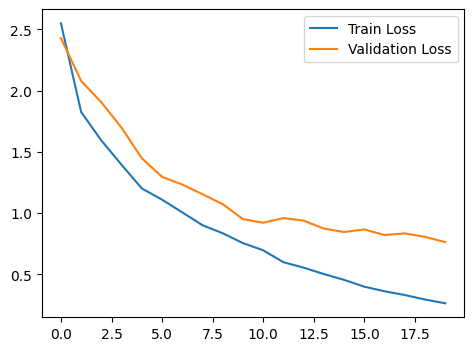

In [15]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

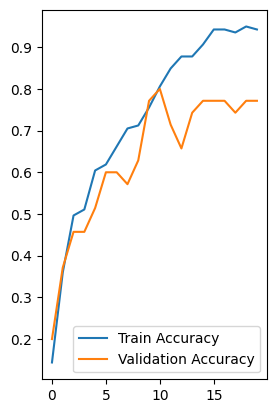

In [16]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [28]:
test_df = pd.read_csv('test_dataset.csv')

X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

In [29]:
print (model.input_shape[1])

120


In [30]:
input_shape = model.input_shape[1]
# Reshape the test data
X_test_flat = np.array([x.flatten() for x in X_test])
#X_test = X_test.reshape(X_test.shape[0], input_shape, 1)

In [31]:
y_test_encoded = le.fit_transform(y_test)
num_classes_test = len(np.unique(y_test_encoded))
y_test_categorical = to_categorical(y_test_encoded, num_classes=num_classes_test)

In [32]:
print(num_classes)

9


In [33]:
print(y_test_categorical)

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1.

In [34]:
predictions = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [35]:
predicted_classes = np.argmax(predictions, axis=1)
original_predicted_classes = label_encoder.inverse_transform(predicted_classes)

print("Predicted Classes:", original_predicted_classes)

Predicted Classes: ['Darbari' 'Asavari' 'Asavari' 'Asavari' 'Asavari' 'Bageshree' 'Bhoopali'
 'Bhoopali' 'Bhoopali' 'Asavari' 'Bhoopali' 'Bageshree' 'Malkauns' 'Yaman'
 'Bageshree' 'Bageshree' 'Bhairava' 'Bageshree' 'Bhoopali' 'Asavari'
 'Bhairavi' 'Bhairavi' 'Yaman' 'Yaman' 'Bhoopali' 'Bhoopali' 'Yaman'
 'Bhoopali' 'Bhairava' 'Yaman' 'Bhoopali' 'Yaman' 'Asavari' 'Bhoopali'
 'Bhairava' 'Bhoopali' 'Bhairavi' 'Bhairavi' 'Bhairavi' 'Bhairavi'
 'Bhairavi' 'Bhairavi' 'Bhairavi' 'Bhairavi' 'Bhairavi' 'Bhairavi'
 'Bhoopali' 'Bhoopali' 'Sarang' 'Sarang' 'Bhoopali' 'Bhoopali' 'Bhoopali'
 'Bhoopali' 'Bhoopali' 'Bhoopali' 'Darbari' 'Darbari' 'Darbari' 'Bhoopali'
 'Darbari' 'Darbari' 'Darbari' 'Darbari' 'Darbari' 'Darbari' 'Yaman'
 'Malkauns' 'Bageshree' 'Bageshree' 'Sarang' 'Bhairavi' 'Malkauns'
 'Malkauns' 'Malkauns' 'Bhoopali' 'Sarang' 'Yaman' 'Sarang' 'Sarang'
 'Malkauns' 'Sarang' 'Bhoopali' 'Darbari' 'Sarang' 'Bhoopali' 'Yaman'
 'Malkauns' 'Yaman' 'Yaman' 'Yaman' 'Yaman' 'Yaman' 'Yaman' 'Yama

In [36]:
print("Shape of X_test:", X_test_flat.shape)
print("Shape of y_test_categorical:", y_test_categorical.shape)

Shape of X_test: (96, 120)
Shape of y_test_categorical: (96, 9)


In [37]:
print("Data type of X_test:", X_test.dtype)
print("Data type of y_test_categorical:", y_test_categorical.dtype)

Data type of X_test: float64
Data type of y_test_categorical: float64


In [38]:
# Evaluate the model
try:
    loss, accuracy = model.evaluate(X_test_flat, y_test_categorical, verbose=0)
    print(f'Test Loss: {loss:.4f}')
    print(f'Test Accuracy: {accuracy:.4f}')
except ValueError as e:
    print(f"Error during evaluation: {e}")

Test Loss: 1.2770
Test Accuracy: 0.5833



Classification Report:
              precision    recall  f1-score   support

     Asavari       0.71      0.50      0.59        10
   Bageshree       0.57      0.33      0.42        12
    Bhairava       0.67      0.14      0.24        14
    Bhairavi       0.77      1.00      0.87        10
    Bhoopali       0.35      0.80      0.48        10
     Darbari       0.82      0.90      0.86        10
    Malkauns       0.57      0.40      0.47        10
      Sarang       0.62      0.50      0.56        10
       Yaman       0.53      0.90      0.67        10

    accuracy                           0.58        96
   macro avg       0.62      0.61      0.57        96
weighted avg       0.62      0.58      0.55        96



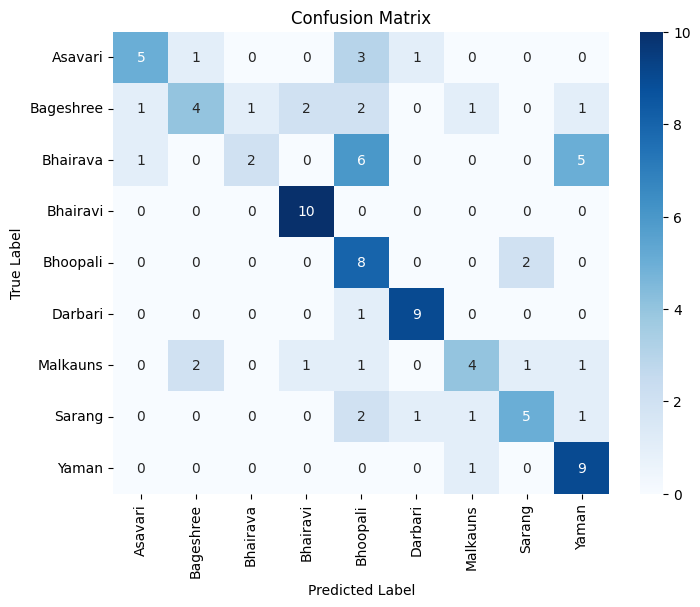

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("\nClassification Report:")
print(classification_report(y_test, original_predicted_classes))
cm = confusion_matrix(y_test, original_predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
